In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
from fastai.vision import *

In [76]:
path = Path('/Users/Zc/Downloads/ScenesData')

In [ ]:
tfms = get_transforms()

In [148]:
##init the data, data augmentation, normalizaton
data = ImageDataBunch.from_folder(path/'train', valid_pct=0.2, ds_tfms=tfms, size=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1200 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
Forest,Forest,Forest,Forest,Forest
Path: /Users/Zc/Downloads/ScenesData/train;

Valid: LabelList (300 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
Suburb,Office,Office,TallBuilding,industrial
Path: /Users/Zc/Downloads/ScenesData/train;

Test: None

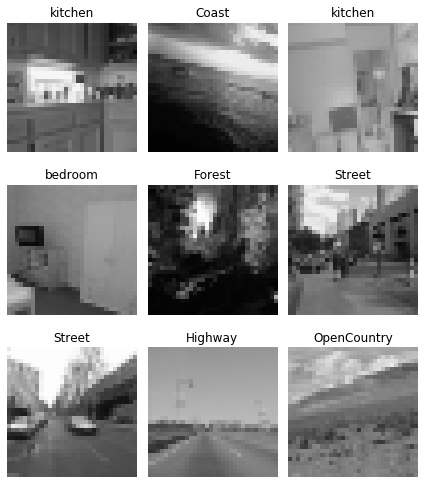

In [149]:
data.show_batch(rows=3, figsize=(6,7)) #overview of data

In [150]:
print(data.classes) #check classed

['Coast', 'Forest', 'Highway', 'Insidecity', 'Mountain', 'Office', 'OpenCountry', 'Street', 'Suburb', 'TallBuilding', 'bedroom', 'industrial', 'kitchen', 'livingroom', 'store']


In [152]:
##iteration 1
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.680404,2.393059,0.733333,00:17
1,3.233888,2.631232,0.690000,00:17
2,2.936039,2.447573,0.696667,00:16
3,2.729129,2.413108,0.670000,00:16


In [154]:
##iteration 2
data = ImageDataBunch.from_folder(path/'train', valid_pct=0.2, ds_tfms=tfms, size=64)
data.normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.588967,1.959989,0.563333,00:46
1,2.788300,1.713539,0.506667,00:50
2,2.259208,1.430323,0.463333,00:46
3,2.022652,1.365320,0.413333,00:56


In [155]:
data = ImageDataBunch.from_folder(path/'train', valid_pct=0.2, ds_tfms=tfms, size=128)
data.normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.083541,1.285854,0.403333,02:36
1,1.994757,0.883997,0.263333,02:29
2,1.458906,0.648288,0.230000,02:23
3,1.166684,0.608759,0.203333,02:17


In [64]:
#first trained model
learn.save('scene-1') 

In [49]:
##init the interpreter
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

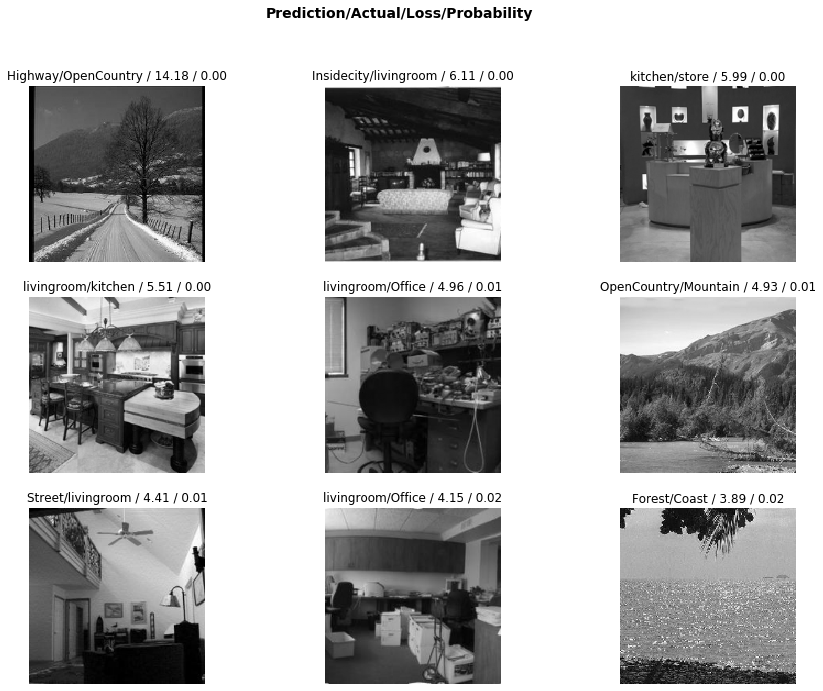

In [50]:
##find the most confused images
interp.plot_top_losses(9, figsize=(15,11))

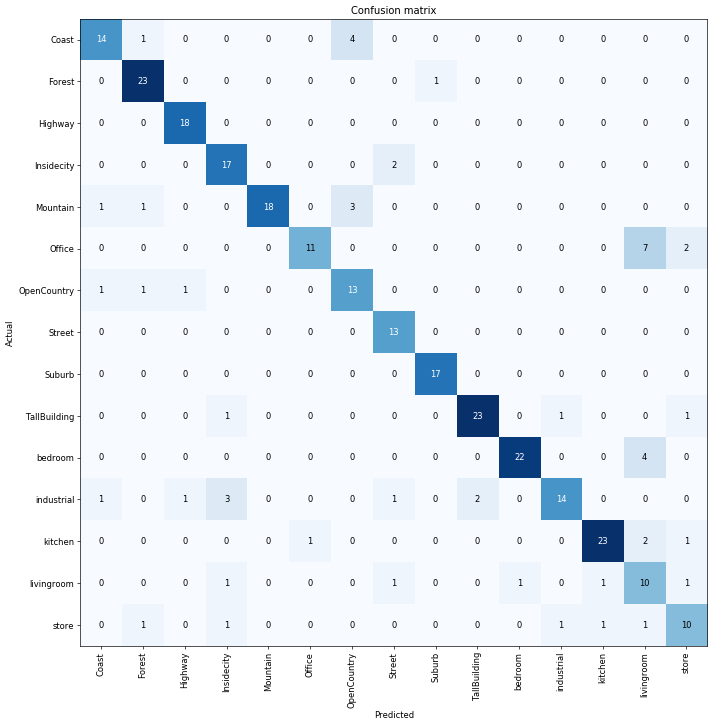

In [51]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [62]:
##get confused pair of classes in decreased order
interp.most_confused()

[('Office', 'livingroom', 7),
 ('Coast', 'OpenCountry', 4),
 ('bedroom', 'livingroom', 4),
 ('Mountain', 'OpenCountry', 3),
 ('industrial', 'Insidecity', 3),
 ('Insidecity', 'Street', 2),
 ('Office', 'store', 2),
 ('industrial', 'TallBuilding', 2),
 ('kitchen', 'livingroom', 2),
 ('Coast', 'Forest', 1),
 ('Forest', 'Suburb', 1),
 ('Mountain', 'Coast', 1),
 ('Mountain', 'Forest', 1),
 ('OpenCountry', 'Coast', 1),
 ('OpenCountry', 'Forest', 1),
 ('OpenCountry', 'Highway', 1),
 ('TallBuilding', 'Insidecity', 1),
 ('TallBuilding', 'industrial', 1),
 ('TallBuilding', 'store', 1),
 ('industrial', 'Coast', 1),
 ('industrial', 'Highway', 1),
 ('industrial', 'Street', 1),
 ('kitchen', 'Office', 1),
 ('kitchen', 'store', 1),
 ('livingroom', 'Insidecity', 1),
 ('livingroom', 'Street', 1),
 ('livingroom', 'bedroom', 1),
 ('livingroom', 'kitchen', 1),
 ('livingroom', 'store', 1),
 ('store', 'Forest', 1),
 ('store', 'Insidecity', 1),
 ('store', 'industrial', 1),
 ('store', 'kitchen', 1),
 ('store', 

In [158]:
learn.unfreeze()

In [159]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.638629,0.797231,0.200000,03:43


In [67]:
learn.save('scene-2'); #unfreezed tuning

In [160]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


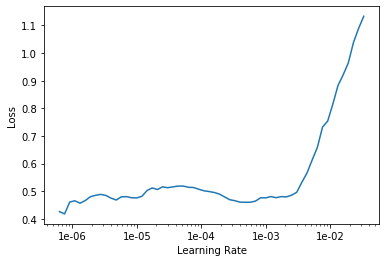

In [161]:
learn.recorder.plot()

In [ ]:
learn.save('scene-3'); #LR-tuning

In [162]:
learn.unfreeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.500020,0.734916,0.183333,03:51
1,0.506406,0.723164,0.180000,04:19
2,0.462142,0.685547,0.180000,03:54
3,0.385855,0.498072,0.140000,03:46


In [88]:
learn.save('scene-4');

In [89]:
path.ls()

[PosixPath('/Users/Zc/Downloads/ScenesData/.DS_Store'),
 PosixPath('/Users/Zc/Downloads/ScenesData/test'),
 PosixPath('/Users/Zc/Downloads/ScenesData/models'),
 PosixPath('/Users/Zc/Downloads/ScenesData/train')]

In [111]:
img = open_image(path/'test/524.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

livingroom


In [142]:
file = open("run3.txt","a")

In [143]:
import os
amount = 0
for files in os.listdir(path/'test'):
    amount = amount+1
    img = open_image(path/'test'/files)
    pred_class,pred_idx,outputs = learn.predict(img)
    print(files+" "+str(pred_class))
    file.write(files+" "+str(pred_class)+"\n")
print('predicted '+str(amount)+' images')
file.close

63.jpg Insidecity
823.jpg Highway
2666.jpg store
2100.jpg Coast
1409.jpg kitchen
189.jpg Insidecity
2114.jpg industrial
2672.jpg bedroom
77.jpg kitchen
837.jpg industrial
2882.jpg bedroom
1353.jpg Office
1435.jpg TallBuilding
2128.jpg Suburb
1421.jpg Forest
1347.jpg industrial
2896.jpg Insidecity
638.jpg Highway
2869.jpg Mountain
1390.jpg industrial
604.jpg Forest
2699.jpg livingroom
2841.jpg industrial
162.jpg Mountain
176.jpg OpenCountry
2855.jpg Insidecity
88.jpg bedroom
610.jpg Street
1384.jpg OpenCountry
2302.jpg Forest
2464.jpg Street
1179.jpg Suburb
2470.jpg livingroom
2316.jpg Street
1637.jpg Insidecity
1151.jpg Mountain
2458.jpg industrial
1145.jpg industrial
1623.jpg Highway
1810.jpg industrial
1804.jpg Forest
348.jpg Mountain
360.jpg Coast
406.jpg Mountain
1192.jpg Forest
1186.jpg industrial
412.jpg Coast
1838.jpg livingroom
374.jpg Street
2276.jpg Street
2510.jpg Mountain
1019.jpg Highway
599.jpg store
2504.jpg Highway
2262.jpg industrial
1743.jpg Suburb
1025.jpg industrial

788.jpg OpenCountry
950.jpg kitchen
2073.jpg Suburb
2067.jpg OpenCountry
1208.jpg Coast
944.jpg industrial
2701.jpg industrial
1220.jpg Coast
2729.jpg livingroom
1546.jpg Street
1552.jpg Coast
1234.jpg TallBuilding
978.jpg Highway
1963.jpg Insidecity
549.jpg livingroom
1977.jpg Forest
1787.jpg Forest
213.jpg Mountain
575.jpg Insidecity
561.jpg OpenCountry
207.jpg Street
1793.jpg kitchen
2271.jpg OpenCountry
1778.jpg Forest
2517.jpg Insidecity
2503.jpg Insidecity
2265.jpg OpenCountry
1744.jpg kitchen
1022.jpg Insidecity
1036.jpg Office
2259.jpg kitchen
1750.jpg kitchen
1988.jpg Forest
1817.jpg livingroom
429.jpg Coast
1803.jpg OpenCountry
367.jpg Mountain
1195.jpg Street
401.jpg Forest
2488.jpg Coast
415.jpg kitchen
1181.jpg industrial
373.jpg Mountain
2305.jpg store
398.jpg Coast
2463.jpg Mountain
2477.jpg OpenCountry
1618.jpg Forest
2311.jpg Highway
1630.jpg OpenCountry
2339.jpg kitchen
1156.jpg livingroom
1142.jpg Office
1624.jpg Forest
159.jpg Insidecity
2846.jpg OpenCountry
603.jpg

2835.jpg Suburb
2821.jpg Coast
664.jpg Insidecity
1496.jpg Street
102.jpg Insidecity
2410.jpg store
1119.jpg Highway
2376.jpg TallBuilding
2362.jpg TallBuilding
499.jpg Forest
2404.jpg Mountain
1125.jpg Insidecity
1643.jpg industrial
1657.jpg kitchen
2438.jpg store
1131.jpg Highway
1864.jpg bedroom
328.jpg Mountain
1870.jpg Mountain
472.jpg kitchen
1858.jpg Forest
1680.jpg Office
314.jpg Office
2389.jpg store
300.jpg Mountain
1694.jpg store
466.jpg Highway
2564.jpg store
2202.jpg kitchen
2216.jpg Coast
1079.jpg TallBuilding
2570.jpg Insidecity
1051.jpg bedroom
2558.jpg Forest
1737.jpg Insidecity
1723.jpg Street
1045.jpg Mountain
1910.jpg Street
248.jpg bedroom
1904.jpg Mountain
1092.jpg Forest
506.jpg store
260.jpg Suburb
274.jpg TallBuilding
1938.jpg Highway
512.jpg industrial
1086.jpg bedroom
2000.jpg Coast
1509.jpg Mountain
923.jpg Insidecity
2766.jpg OpenCountry
2772.jpg Coast
937.jpg TallBuilding
2014.jpg store
1535.jpg Office
2982.jpg TallBuilding
1253.jpg Forest
1247.jpg livingr

475.jpg OpenCountry
313.jpg Office
1687.jpg Insidecity
1693.jpg industrial
307.jpg kitchen
461.jpg Mountain
2417.jpg industrial
2371.jpg industrial
1678.jpg OpenCountry
2365.jpg OpenCountry
2403.jpg kitchen
1122.jpg TallBuilding
1644.jpg livingroom
2359.jpg industrial
1888.jpg OpenCountry
1650.jpg Insidecity
1136.jpg Mountain
893.jpg store
887.jpg Coast
139.jpg Highway
1485.jpg Insidecity
111.jpg store
2832.jpg Insidecity
677.jpg Coast
663.jpg store
2826.jpg Suburb
2198.jpg Forest
105.jpg industrial
1491.jpg Mountain
2173.jpg industrial
2615.jpg Coast
850.jpg bedroom
10.jpg OpenCountry
688.jpg livingroom
844.jpg bedroom
1308.jpg bedroom
2601.jpg livingroom
2167.jpg industrial
1446.jpg store
1320.jpg industrial
2629.jpg kitchen
878.jpg Mountain
38.jpg Suburb
1334.jpg store
1452.jpg Insidecity
2142.jpg TallBuilding
21.jpg Street
861.jpg Coast
2624.jpg bedroom
2630.jpg OpenCountry
35.jpg store
1339.jpg TallBuilding
875.jpg Coast
2156.jpg kitchen
1477.jpg TallBuilding
2618.jpg livingroom
6

2568.jpg Street
1707.jpg Mountain
293.jpg Street
2226.jpg Mountain
1049.jpg TallBuilding
2540.jpg kitchen
2554.jpg Office
2232.jpg Street
244.jpg Mountain
1908.jpg Coast
522.jpg TallBuilding
536.jpg OpenCountry
250.jpg Coast
278.jpg Highway
1934.jpg Street
2583.jpg Office
2597.jpg Street
1920.jpg TallBuilding
1277.jpg kitchen
2018.jpg Insidecity
1511.jpg livingroom
1505.jpg Insidecity
1263.jpg store
2742.jpg Insidecity
907.jpg Coast
2024.jpg Insidecity
2030.jpg Insidecity
1539.jpg Insidecity
913.jpg Suburb
2756.jpg livingroom
2965.jpg TallBuilding
720.jpg kitchen
734.jpg Coast
2971.jpg Street
1288.jpg OpenCountry
2959.jpg TallBuilding
2781.jpg TallBuilding
2795.jpg kitchen
708.jpg Coast
709.jpg TallBuilding
2794.jpg industrial
2780.jpg Insidecity
2958.jpg Mountain
1289.jpg kitchen
2970.jpg Office
735.jpg Insidecity
721.jpg bedroom
2964.jpg OpenCountry
1538.jpg Forest
2031.jpg Office
2757.jpg livingroom
912.jpg industrial
906.jpg store
2743.jpg store
2025.jpg kitchen
1504.jpg Forest
126

1824.jpg store
1830.jpg OpenCountry
2487.jpg kitchen
1165.jpg Street
1603.jpg store
397.jpg Suburb
383.jpg Mountain
1617.jpg Insidecity
1171.jpg Street
2478.jpg kitchen
1159.jpg Forest
2450.jpg industrial
2336.jpg store
2322.jpg Coast
2444.jpg Coast
156.jpg Office
2875.jpg store
630.jpg Mountain
624.jpg industrial
2861.jpg Forest
142.jpg industrial
1398.jpg industrial
94.jpg TallBuilding
2849.jpg Mountain
2691.jpg store
2685.jpg TallBuilding
618.jpg Forest
80.jpg bedroom
2108.jpg livingroom
195.jpg Insidecity
1401.jpg Forest
1367.jpg Office
1373.jpg kitchen
1415.jpg industrial
181.jpg TallBuilding
5.jpg livingroom
2134.jpg kitchen
2652.jpg OpenCountry
817.jpg Street
57.jpg Mountain
803.jpg Coast
43.jpg OpenCountry
2646.jpg Coast
2120.jpg Coast
1429.jpg Mountain
55.jpg Coast
1359.jpg bedroom
815.jpg Insidecity
2888.jpg Highway
2650.jpg Street
2136.jpg store
7.jpg Office
2122.jpg Street
2644.jpg OpenCountry
41.jpg kitchen
801.jpg TallBuilding
69.jpg Forest
1365.jpg industrial
829.jpg Off

1149.jpg store
2440.jpg OpenCountry
2326.jpg OpenCountry
2332.jpg Suburb
2454.jpg Coast
422.jpg Forest
1808.jpg store
344.jpg store
350.jpg OpenCountry
436.jpg Mountain
2483.jpg store
1834.jpg Suburb
378.jpg Street
1820.jpg Forest
2497.jpg OpenCountry
2508.jpg OpenCountry
1001.jpg livingroom
595.jpg Coast
1767.jpg Highway
1773.jpg industrial
581.jpg Mountain
1015.jpg OpenCountry
2534.jpg kitchen
2252.jpg Office
1983.jpg bedroom
1997.jpg Mountain
2246.jpg livingroom
2520.jpg industrial
1029.jpg Office
556.jpg Insidecity
230.jpg livingroom
224.jpg TallBuilding
1968.jpg industrial
542.jpg bedroom
1798.jpg livingroom
1940.jpg kitchen
2291.jpg Coast
2285.jpg Suburb
218.jpg TallBuilding
1954.jpg store
1565.jpg Mountain
797.jpg Coast
1203.jpg store
1217.jpg Coast
783.jpg Mountain
1571.jpg Forest
2078.jpg Highway
1559.jpg Suburb
2050.jpg store
2736.jpg TallBuilding
973.jpg Mountain
967.jpg Coast
2722.jpg kitchen
2044.jpg Coast
2911.jpg TallBuilding
754.jpg TallBuilding
740.jpg TallBuilding
998

<function TextIOWrapper.close()>